 # Uber Booking and Fare Analysis

### Introduction 

This project, **Uber Booking and Fare Analysis**, focuses on exploring ride booking data to understand travel patterns, fare behavior, and customer booking trends. The dataset contains detailed trip-level information such as pickup and drop locations, trip distance, duration, fare amount, vehicle type, payment method, and booking status. Using Python libraries like Pandas, NumPy, Matplotlib, and Seaborn, we perform Exploratory Data Analysis (EDA) to clean, summarize, and visualize the data.

The analysis aims to uncover useful insights from the Uber ride dataset — such as which locations have the highest bookings, how fares vary with distance and vehicle type, which payment modes are most used, and how booking outcomes are distributed. These insights help in understanding customer behavior and operational patterns, and they demonstrate practical EDA skills used in real-world data analytics projects.


##  Business Questions 

###  1. Which locations have the highest number of bookings?
By analyzing pickup location counts, we can identify the cities/areas with the highest ride demand. These locations represent high-traffic zones where more drivers and dynamic pricing strategies can be applied to maximize revenue and reduce wait time.
###  2. Which vehicle type generates the most bookings?
Vehicle type analysis shows which category (Mini, Sedan, SUV, etc.) is most preferred by customers. The most booked vehicle type indicates customer affordability and comfort preference, helping in fleet allocation planning.
###  3. How does trip distance affect fare amount?
There is generally a positive relationship between trip distance and fare amount — longer trips lead to higher fares. Scatter plots and correlation analysis usually show a strong upward trend, which validates the fare calculation logic.
###  4. Which payment method is used most frequently?
By analyzing payment type distribution (UPI, Card, Cash, Wallet), we can determine the most popular payment method. This helps businesses optimize digital payment partnerships and promotional offers.
###  5. What is the percentage of completed vs cancelled or no-show bookings?
Booking status analysis reveals operational efficiency. A high completion rate indicates good service reliability, while higher cancellations or no-shows may signal pricing issues, driver delays, or customer behavior patterns that need improvement.


# Report Structure

This report is organized as follows:

- **Data Overview** - dataset overview, dataset source, size, and initial observations
- **Data Preprocessing** - data cleaning, handling missing values, and preparation for analysis
- **Exploratory Data Analysis** - analysis: statistical summaries, visualizations, and key findings
- **Conclusion** - summary of the main insights from the analysis
- **Recommendations** - recommendations based on the findings
- **Reference** - references used in the report

# Importing relevant libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Key Findings

1. **Booking Distribution is Uneven Across Locations**
   Some pickup locations show significantly higher booking volumes than others, indicating demand hotspots where more driver availability is required.

2. **Completed Rides Form the Majority of Bookings**
   Most trips are successfully completed, while a smaller portion are marked as cancelled or no-show — suggesting generally good service fulfillment but still room to reduce failed bookings.

3. **Fare Amount Increases with Trip Distance and Duration**
   Trips with longer distance and higher duration tend to have higher fares, showing a strong positive relationship between distance, time, and pricing.

4. **SUV and Sedan Categories Contribute Higher Fare Value**
   Premium vehicle types typically generate higher average fares compared to smaller vehicle categories, even if their booking count is lower.

5. **Digital Payments Dominate Transactions**
   UPI, Card, and Wallet payments are used more frequently than cash, indicating strong customer preference for digital payment modes.


## 1 Data Overview 
 

In [3]:
df = pd.read_csv("uber_10000_dataset.csv")
df

,Trip_ID,Pickup_Date,Pickup_Time,Dropoff_Time,Pickup_Location,Dropoff_Location,Trip_Distance_km,Trip_Duration_min,Fare_Amount,Payment_Type,Vehicle_Type,Booking_Status
0,1,1/1/2023,0:00:00,0:30:00,Delhi,Pune,19.12,84,801.73,UPI,SUV,Completed
1,2,1/1/2023,1:00:00,1:30:00,Hyderabad,Delhi,22.97,57,722.44,Wallet,SUV,No Show
2,3,1/1/2023,2:00:00,2:30:00,Bangalore,Hyderabad,25.39,78,726.15,Card,Mini,Completed
3,4,1/1/2023,3:00:00,3:30:00,Hyderabad,Delhi,23.09,73,646.11,Card,Sedan,Completed
4,5,1/1/2023,4:00:00,4:30:00,Hyderabad,Delhi,11.27,12,988.34,Cash,SUV,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2/21/2024,11:00:00,11:30:00,Pune,Delhi,16.92,37,558.24,Card,Sedan,Completed
9996,9997,2/21/2024,12:00:00,12:30:00,Bangalore,Delhi,8.21,78,1053.14,Cash,Auto,Completed
9997,9998,2/21/2024,13:00:00,13:30:00,Pune,Pune,16.12,13,304.74,Card,SUV,No Show
9998,9999,2/21/2024,14:00:00,14:30:00,Delhi,Pune,1.68,29,391.02,Cash,Sedan,No Show


The dataset contains records of ride bookings made through the Uber platform. It includes details such as the pickup date and time, pickup and drop-off locations, trip distance, fare amount, vehicle type, payment method, and booking status.

In [4]:
#Data overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Trip_ID            10000 non-null  int64  
 1   Pickup_Date        10000 non-null  object 
 2   Pickup_Time        10000 non-null  object 
 3   Dropoff_Time       10000 non-null  object 
 4   Pickup_Location    10000 non-null  object 
 5   Dropoff_Location   10000 non-null  object 
 6   Trip_Distance_km   10000 non-null  float64
 7   Trip_Duration_min  10000 non-null  int64  
 8   Fare_Amount        10000 non-null  float64
 9   Payment_Type       10000 non-null  object 
 10  Vehicle_Type       10000 non-null  object 
 11  Booking_Status     10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


In [6]:
df.shape

(10000, 12)

In [7]:
df.head()

,Trip_ID,Pickup_Date,Pickup_Time,Dropoff_Time,Pickup_Location,Dropoff_Location,Trip_Distance_km,Trip_Duration_min,Fare_Amount,Payment_Type,Vehicle_Type,Booking_Status
0,1,1/1/2023,0:00:00,0:30:00,Delhi,Pune,19.12,84,801.73,UPI,SUV,Completed
1,2,1/1/2023,1:00:00,1:30:00,Hyderabad,Delhi,22.97,57,722.44,Wallet,SUV,No Show
2,3,1/1/2023,2:00:00,2:30:00,Bangalore,Hyderabad,25.39,78,726.15,Card,Mini,Completed
3,4,1/1/2023,3:00:00,3:30:00,Hyderabad,Delhi,23.09,73,646.11,Card,Sedan,Completed
4,5,1/1/2023,4:00:00,4:30:00,Hyderabad,Delhi,11.27,12,988.34,Cash,SUV,Completed


In [8]:
df.tail()

,Trip_ID,Pickup_Date,Pickup_Time,Dropoff_Time,Pickup_Location,Dropoff_Location,Trip_Distance_km,Trip_Duration_min,Fare_Amount,Payment_Type,Vehicle_Type,Booking_Status
9995,9996,2/21/2024,11:00:00,11:30:00,Pune,Delhi,16.92,37,558.24,Card,Sedan,Completed
9996,9997,2/21/2024,12:00:00,12:30:00,Bangalore,Delhi,8.21,78,1053.14,Cash,Auto,Completed
9997,9998,2/21/2024,13:00:00,13:30:00,Pune,Pune,16.12,13,304.74,Card,SUV,No Show
9998,9999,2/21/2024,14:00:00,14:30:00,Delhi,Pune,1.68,29,391.02,Cash,Sedan,No Show
9999,10000,2/21/2024,15:00:00,15:30:00,Bangalore,Mumbai,13.52,17,250.84,Card,Mini,Completed


## 2 Exploratory Data Analysis

In [9]:
df.describe()

,Trip_ID,Trip_Distance_km,Trip_Duration_min,Fare_Amount
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,15.749715,47.052000,648.589148
std,2886.89568,8.330632,24.458261,317.783655
min,1.00000,1.000000,5.000000,100.010000
25%,2500.75000,8.640000,26.000000,374.997500
50%,5000.50000,15.860000,47.000000,648.185000
75%,7500.25000,22.822500,68.000000,924.275000
max,10000.00000,30.000000,89.000000,1199.880000


# 3 Data Processing 

In [10]:
df.isnull().sum()

Trip_ID              0
Pickup_Date          0
Pickup_Time          0
Dropoff_Time         0
Pickup_Location      0
Dropoff_Location     0
Trip_Distance_km     0
Trip_Duration_min    0
Fare_Amount          0
Payment_Type         0
Vehicle_Type         0
Booking_Status       0
dtype: int64

In [11]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [12]:
df['Pickup_Date'] = pd.to_datetime(df['Pickup_Date'])
df['Booking_Status'] = df['Booking_Status'].str.strip().str.title()

In [13]:
#here we checked most frequency (count)
df['Vehicle_Type'].value_counts()
df['Payment_Type'].value_counts()

Payment_Type
Cash      2563
UPI       2531
Wallet    2462
Card      2444
Name: count, dtype: int64

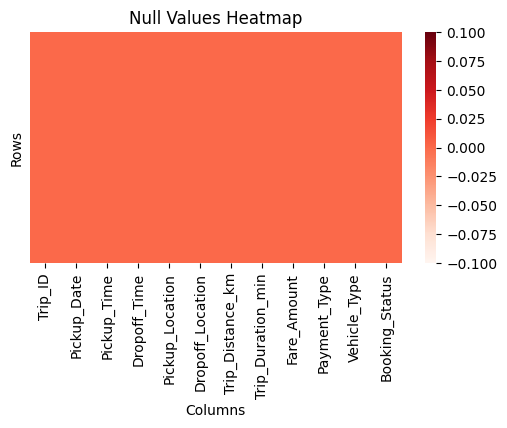

In [14]:
plt.figure(figsize=(6,3))
sns.heatmap(df.isna(), 
            cbar=True, 
            cmap="Reds",
            yticklabels=False)

plt.title("Null Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

## sort data converted into Excel File

In [15]:
df.to_excel('Uber.xlsx',index=False)

## 3.1 Ride Demand 

## 3.2 Bookings by Month

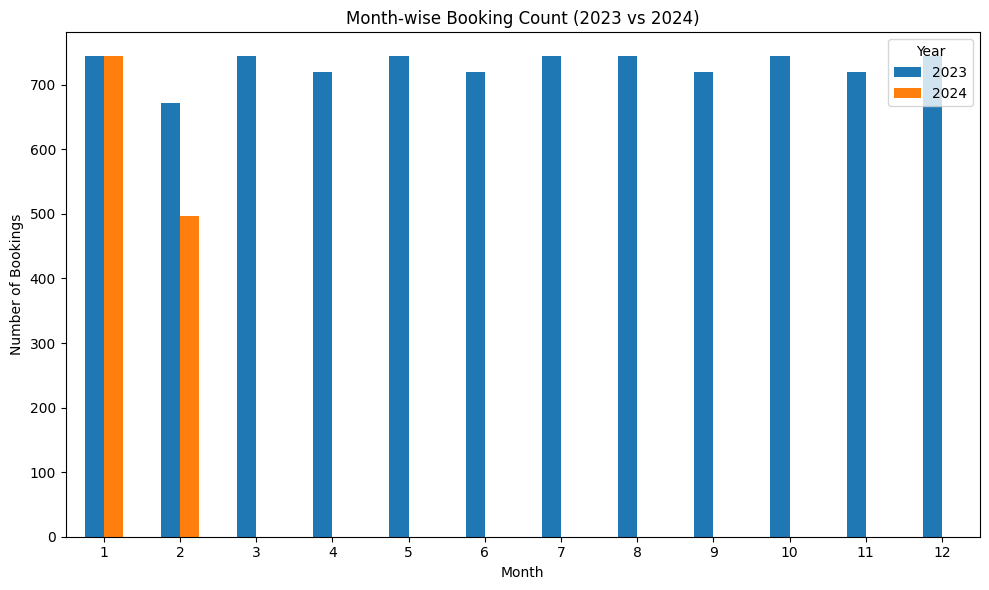

In [16]:

# Convert to datetime (already done, but safe)
df['Pickup_Date'] = pd.to_datetime(df['Pickup_Date'])

# Extract Year and Month
df['Year'] = df['Pickup_Date'].dt.year
df['Month'] = df['Pickup_Date'].dt.month

# Filter only 2023 and 2024 (important)
df_filtered = df[df['Year'].isin([2023, 2024])]

# Create pivot table
monthly_counts = pd.pivot_table(
    df_filtered,
    index='Month',
    columns='Year',
    values='Pickup_Date',
    aggfunc='count'
)

# Plot grouped bar chart
monthly_counts.plot(kind='bar', figsize=(10,6))

plt.title("Month-wise Booking Count (2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Annual Bookings and Revenue Comparison

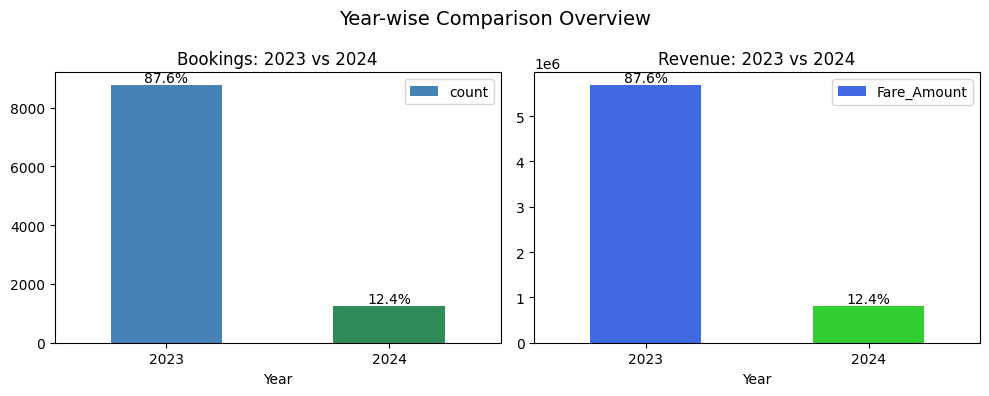

In [17]:
df['Year'] = pd.to_datetime(df['Pickup_Date']).dt.year

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
booking_counts = df['Year'].value_counts().loc[[2023, 2024]]
booking_pct = (booking_counts / booking_counts.sum() * 100).round(1)

ax1 = booking_counts.plot(kind='bar', color=['steelblue','seagreen'])
plt.title("Bookings: 2023 vs 2024")
plt.xticks(rotation=0)
plt.legend()

ax1.bar_label(ax1.containers[0], labels=booking_pct.astype(str) + '%')


plt.subplot(1,2,2)
revenue = df.groupby('Year')['Fare_Amount'].sum().loc[[2023, 2024]]
revenue_pct = (revenue / revenue.sum() * 100).round(1)

ax2 = revenue.plot(kind='bar', color=['royalblue','limegreen'])
plt.title("Revenue: 2023 vs 2024")
plt.xticks(rotation=0)

ax2.bar_label(ax2.containers[0], labels=revenue_pct.astype(str) + '%')


plt.suptitle("Year-wise Comparison Overview", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

The bar chart compares the total number of bookings between 2023 and 2024. It helps identify growth or decline in customer demand year over year. A higher bar indicates increased ride activity, reflecting changes in user adoption, service reach, or market conditions between the two years.

# Revenue of 2023 & 2024

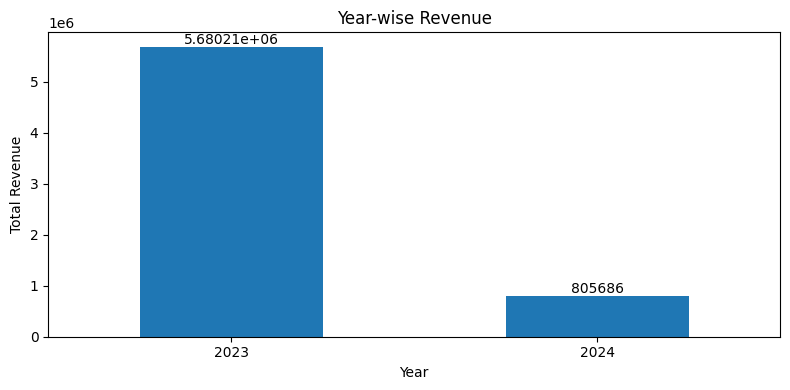

In [24]:
# Convert Pickup_Date to Year
df['Year'] = pd.to_datetime(df['Pickup_Date']).dt.year

# Calculate year-wise revenue
year_revenue = df.groupby('Year')['Fare_Amount'].sum()

# Plot
plt.figure(figsize=(8,4))
ax = year_revenue.plot(kind='bar')

plt.title("Year-wise Revenue")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)

# Add value labels on bars
ax.bar_label(ax.containers[0])

plt.tight_layout()
plt.show()

## 3.3 Sales & Fare Analysis

C:\Users\MANOJ\AppData\Local\Temp\ipykernel_16012\1547780891.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(bins)['Fare_Amount'].mean().plot(marker='o')


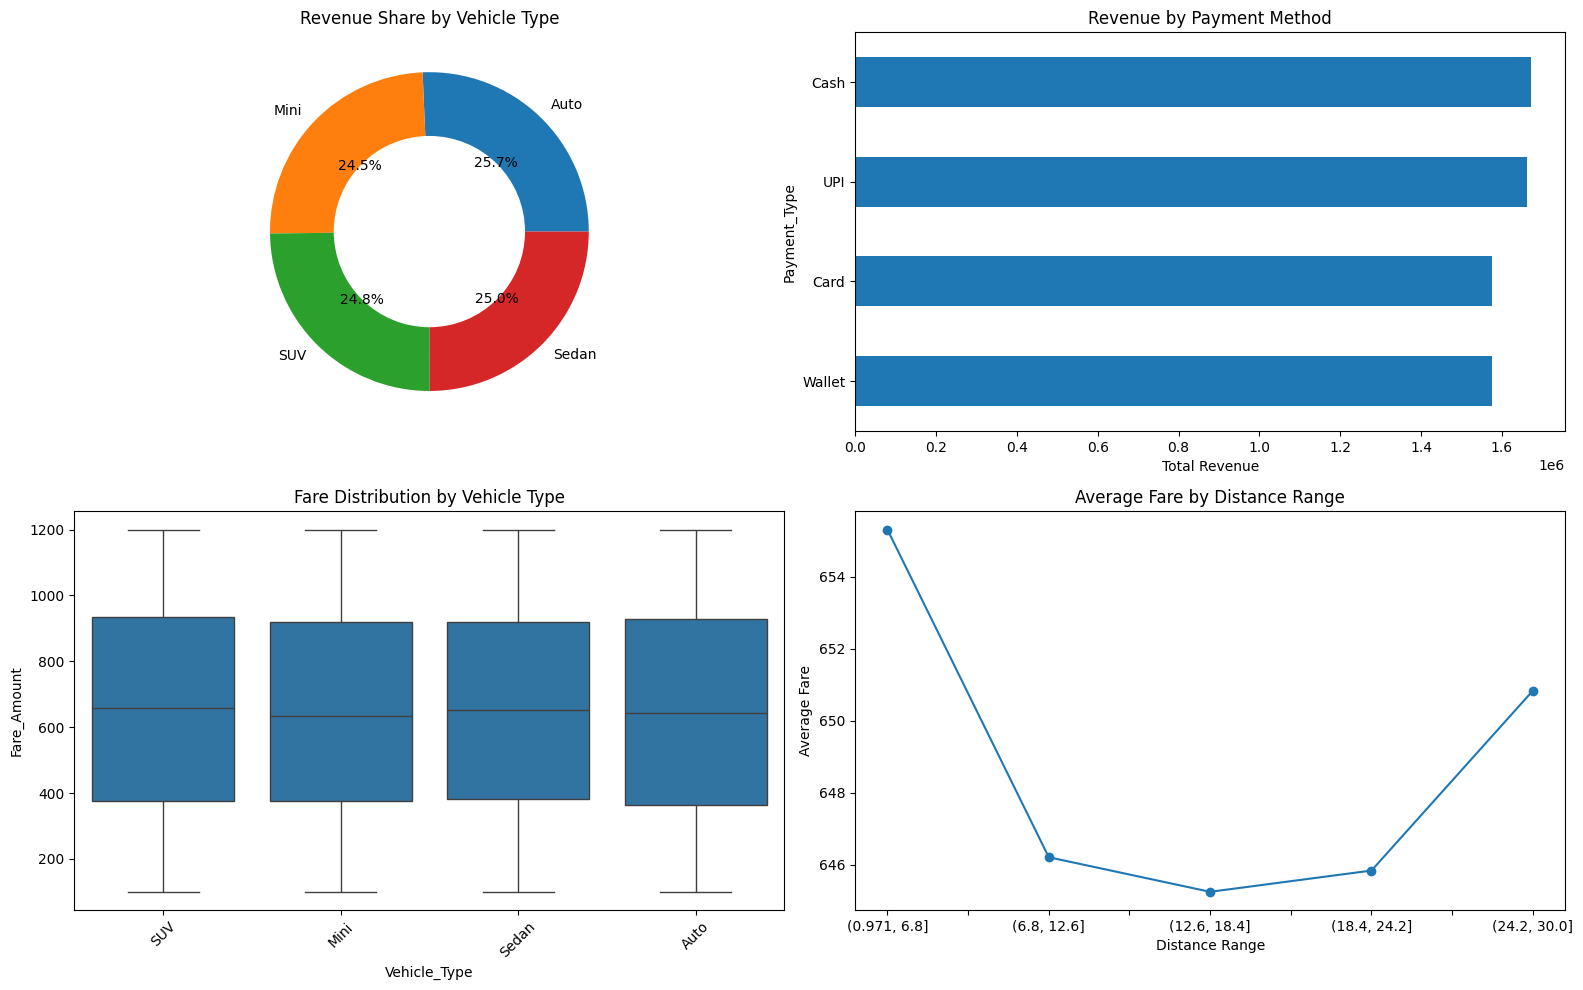

In [19]:
plt.figure(figsize=(16,10))


# 1️ Revenue Share by Vehicle Type — Donut Chart
plt.subplot(2,2,1)
rev_vehicle = df.groupby('Vehicle_Type')['Fare_Amount'].sum()
plt.pie(rev_vehicle, labels=rev_vehicle.index, autopct='%1.1f%%')
plt.title("Revenue Share by Vehicle Type")
centre_circle = plt.Circle((0,0),0.60,fc='white')
plt.gca().add_artist(centre_circle)

# 2️ Revenue by Payment Type — Horizontal Bar
plt.subplot(2,2,2)
df.groupby('Payment_Type')['Fare_Amount'].sum().sort_values().plot(kind='barh')
plt.title("Revenue by Payment Method")
plt.xlabel("Total Revenue")
# 3️ Fare Distribution by Vehicle — Boxplot
plt.subplot(2,2,3)
sns.boxplot(x='Vehicle_Type', y='Fare_Amount', data=df)
plt.title("Fare Distribution by Vehicle Type")
plt.xticks(rotation=45)

# 4️ Average Fare by Distance Buckets — Line Plot
plt.subplot(2,2,4)
bins = pd.cut(df['Trip_Distance_km'], bins=5)
df.groupby(bins)['Fare_Amount'].mean().plot(marker='o')
plt.title("Average Fare by Distance Range")
plt.xlabel("Distance Range")
plt.ylabel("Average Fare")

plt.tight_layout()
plt.show()

This dashboard analyzes revenue and fare patterns across vehicle types, payment methods, and trip distances to understand key revenue drivers.

## 3.4 Ride Booking Status Breakdown

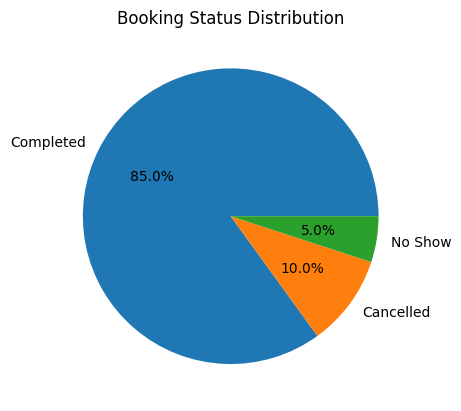

In [20]:
plt.figure()
df['Booking_Status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title("Booking Status Distribution")
plt.ylabel("")
plt.show()

It helps quickly understand the overall success rate of bookings and the proportion of rides that did not get completed.

## 3.5 Trips by Distance Range

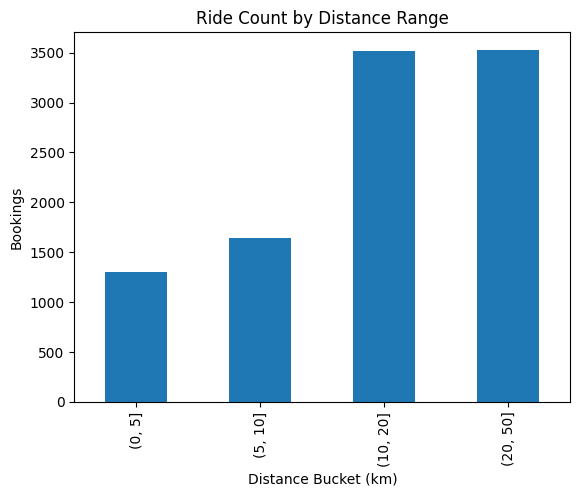

In [21]:
bins = pd.cut(df['Trip_Distance_km'], bins=[0,5,10,20,50])
bins.value_counts().sort_index().plot(kind='bar')

plt.title("Ride Count by Distance Range")
plt.xlabel("Distance Bucket (km)")
plt.ylabel("Bookings")
plt.show()

It helps identify the most common trip lengths and understand customer travel patterns based on distance.

## 3.6 Distance vs Duration with Trend Line

Text(0, 0.5, 'Rides')

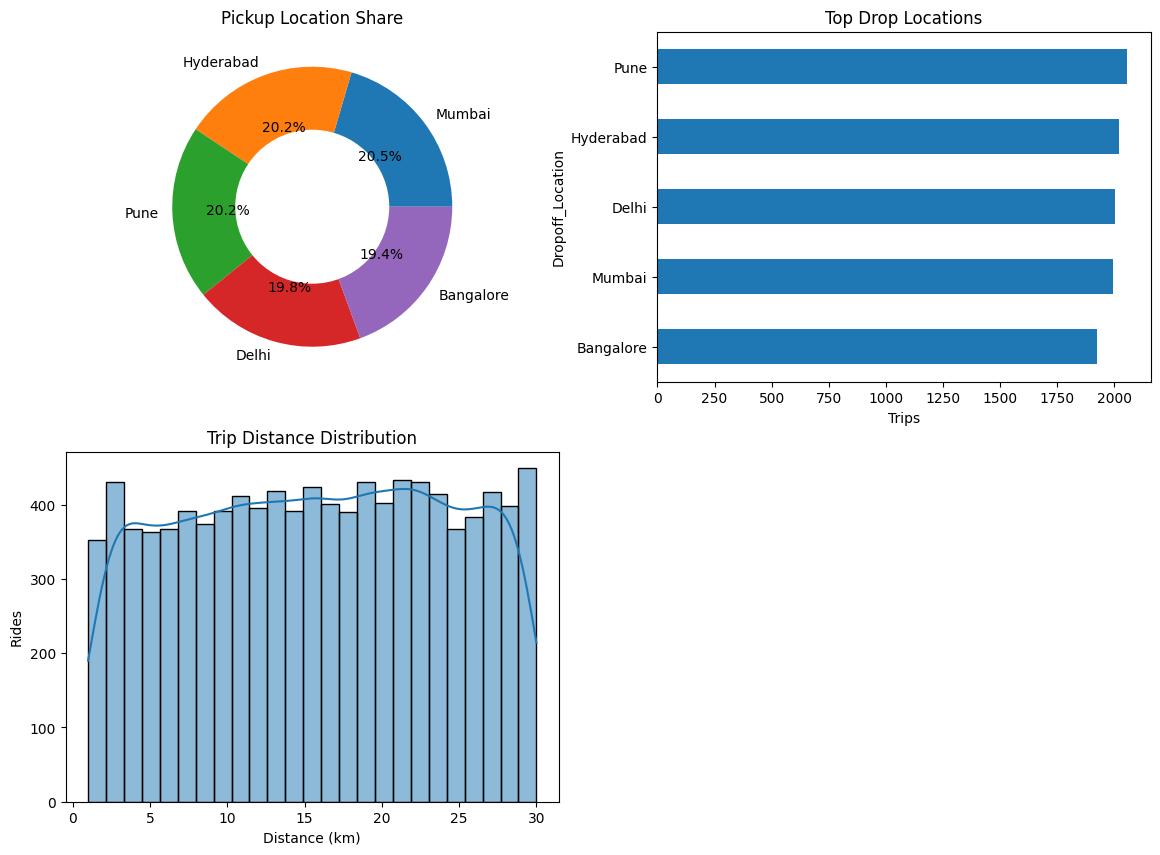

In [22]:
plt.figure(figsize=(14,10))


plt.subplot(2,2,1)
pickup_counts = df['Pickup_Location'].value_counts().head(6)
plt.pie(pickup_counts, labels=pickup_counts.index, autopct='%1.1f%%')
plt.title("Pickup Location Share")
centre = plt.Circle((0,0),0.55,fc='white')
plt.gca().add_artist(centre)


plt.subplot(2,2,2)
df['Dropoff_Location'].value_counts().head(8).sort_values().plot(kind='barh')
plt.title("Top Drop Locations")
plt.xlabel("Trips")


plt.subplot(2,2,3)
sns.histplot(data=df,x='Trip_Distance_km',bins=25,kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("Distance (km)")
plt.ylabel("Rides")



This visualization highlights major pickup and drop locations along with the overall distribution of trip distances, helping identify demand hotspots and travel patterns.

In [23]:
summary = {
    "Total Bookings": len(df),

    "Completion Rate (%)": 
        df["Booking_Status"]
        .str.contains("complete|success", case=False, na=False)
        .mean() * 100,

    "Total Revenue": df["Fare_Amount"].sum(),

    "Top Vehicle Type": df["Vehicle_Type"].mode()[0],

    "Top Payment Method": df["Payment_Type"].mode()[0],

    "Avg Fare": df["Fare_Amount"].mean(),

    "Avg Trip Distance (km)": df["Trip_Distance_km"].mean(),

    "Peak Booking Month": 
        pd.to_datetime(df["Pickup_Date"]).dt.month.mode()[0],

    "Highest Revenue Vehicle": 
        df.groupby("Vehicle_Type")["Fare_Amount"].sum().idxmax()
}

summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
summary_df

,Metric,Value
0,Total Bookings,10000
1,Completion Rate (%),84.97
2,Total Revenue,6485891.48
3,Top Vehicle Type,Auto
4,Top Payment Method,Cash
5,Avg Fare,648.589148
6,Avg Trip Distance (km),15.749715
7,Peak Booking Month,1
8,Highest Revenue Vehicle,Auto


# Conclusion

This exploratory data analysis of the Uber ride booking dataset reveals important insights into customer behavior, revenue patterns, and operational performance. The analysis shows that most bookings are successfully completed, indicating a strong service reliability, while cancellations form a smaller portion of total rides. Short to medium distance trips contribute the highest number of bookings, highlighting their importance to overall demand.

Vehicle type and payment method analysis indicates clear customer preferences, with certain vehicle categories and digital payment methods generating the majority of rides and revenue. Fare analysis demonstrates a positive relationship between trip distance and fare amount, confirming logical pricing behavior. Additionally, temporal analysis identifies peak months with higher booking activity, which can help in demand forecasting and resource planning.

 # Business Recommendation

1 Focus on High-Demand Short Trips
Since most bookings fall within short to medium distance ranges, Uber should prioritize driver availability in high-demand zones to reduce wait times and increase ride completion rates.

2 Optimize Fleet by Vehicle Type
Vehicle types generating the highest revenue and bookings should be expanded, while underperforming categories can be reviewed for cost optimization or targeted promotions.

3 Encourage Preferred Payment Methods
Payment methods contributing the most to revenue should be promoted through cashback offers or discounts to improve customer convenience and transaction success rates.

4 Reduce Cancellations
Analysis of booking status suggests scope for reducing cancellations by improving driver assignment speed, fare transparency, and real-time ride tracking.

5 Seasonal and Peak-Time Planning
Peak booking months identified in the analysis should be leveraged with surge pricing strategies, driver incentives, and promotional campaigns to maximize revenue.

6 Distance-Based Pricing Insights
As fares increase logically with trip distance, Uber can fine-tune pricing slabs to maintain competitiveness while ensuring profitability for longer trips.